In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("F:/Analytics Vidhya Hackathon/AmExpert2018/train.csv")

In [3]:
df_userlogs = pd.read_csv("F:/Analytics Vidhya Hackathon/AmExpert2018/historical_user_logs.csv")

In [4]:
df_test = pd.read_csv("F:/Analytics Vidhya Hackathon/AmExpert2018/test.csv")

In [5]:
df_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [6]:
df_userlogs.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


In [7]:
df_train.shape

(463291, 15)

In [8]:
df_userlogs.shape

(24287534, 4)

In [9]:
df_test.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [10]:
df_test.shape

(128858, 14)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        97437 non-null float64
user_group_id             445048 non-null float64
gender                    445048 non-null object
age_level                 445048 non-null float64
user_depth                445048 non-null float64
city_development_index    338162 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 53.0+ MB


In [12]:
df_train.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


In [13]:
df_train.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [14]:
df_test.isnull().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64

In [15]:
df_userlogs.isnull().sum()

DateTime    0
user_id     0
product     0
action      0
dtype: int64

In [16]:
df_userlogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24287534 entries, 0 to 24287533
Data columns (total 4 columns):
DateTime    object
user_id     int64
product     object
action      object
dtypes: int64(1), object(3)
memory usage: 741.2+ MB


In [17]:
df_train.select_dtypes(include = ['object']).nunique()

DateTime    8610
product       10
gender         2
dtype: int64

In [18]:
df_test.select_dtypes(include = ['object']).nunique()

DateTime    2724
product       10
gender         2
dtype: int64

In [19]:
df_userlogs.select_dtypes(include = ['object']).nunique()

DateTime    21452
product        10
action          2
dtype: int64

In [20]:
df_train.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')

In [21]:
df_test.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1'],
      dtype='object')

In [22]:
df_userlogs.columns

Index(['DateTime', 'user_id', 'product', 'action'], dtype='object')

In [23]:
df_userlogs.isnull().sum()

DateTime    0
user_id     0
product     0
action      0
dtype: int64

In [24]:
df_userlogs.select_dtypes(include = ['object']).nunique()

DateTime    21452
product        10
action          2
dtype: int64

In [25]:
df_train.select_dtypes(include = ["int64"]).nunique()

session_id            463291
user_id               150347
campaign_id               10
webpage_id                 9
product_category_1         5
var_1                      2
is_click                   2
dtype: int64

In [26]:
df_userlogs.select_dtypes(include = ["int64"]).nunique()

user_id    171309
dtype: int64

In [27]:
df_userlogs.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


In [28]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

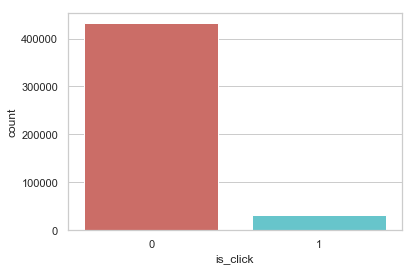

<Figure size 432x288 with 0 Axes>

In [29]:
sns.countplot(x='is_click', data= df_train, palette = 'hls')
plt.show()
plt.savefig('count_plot')

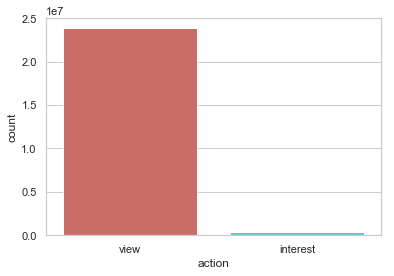

<Figure size 432x288 with 0 Axes>

In [30]:
sns.countplot(x='action', data= df_userlogs, palette = 'hls')
plt.show()
plt.savefig('count_plot')

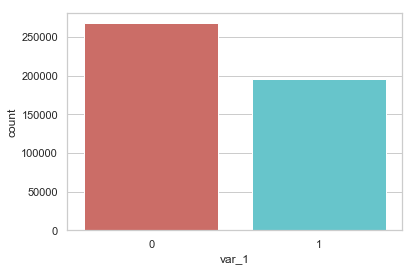

<Figure size 432x288 with 0 Axes>

In [31]:
sns.countplot(x='var_1', data= df_train, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [32]:
df1_train = pd.DataFrame(df_train)
df1_test = pd.DataFrame(df_test)

In [33]:
df1_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [34]:
df1_userlogs = pd.DataFrame(df_userlogs)

In [35]:
df1_userlogs.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


In [42]:
df2_train = df1_train
df2_userlogs = df1_userlogs

In [44]:
X = df2_userlogs
y = df2_train

In [169]:
test = df1_test

In [46]:
X.isnull().sum()

DateTime    0
user_id     0
product     0
action      0
dtype: int64

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24287534 entries, 0 to 24287533
Data columns (total 4 columns):
DateTime    object
user_id     int64
product     object
action      object
dtypes: int64(1), object(3)
memory usage: 741.2+ MB


In [51]:
X.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


In [53]:
import datetime as dt

In [70]:
X['DateTime'] = pd.to_datetime(X['DateTime'])

In [72]:
X.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44:00,704,B,view
1,2017-05-29 07:08:00,499679,F,view
2,2017-05-29 07:10:00,499679,G,view
3,2017-05-29 07:10:00,499679,G,view
4,2017-05-29 07:10:00,499679,G,view


In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24287534 entries, 0 to 24287533
Data columns (total 4 columns):
DateTime    datetime64[ns]
user_id     int64
product     object
action      object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 741.2+ MB


In [78]:
X['DateTime'] = pd.DatetimeIndex(X['DateTime'])

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24287534 entries, 0 to 24287533
Data columns (total 4 columns):
DateTime    datetime64[ns]
user_id     int64
product     object
action      object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 741.2+ MB


In [82]:
# Converting DateTime as Index
X1 = X.set_index('DateTime')

In [83]:
X1.head()

,user_id,product,action
DateTime,,,
2017-05-28 15:44:00,704,B,view
2017-05-29 07:08:00,499679,F,view
2017-05-29 07:10:00,499679,G,view
2017-05-29 07:10:00,499679,G,view
2017-05-29 07:10:00,499679,G,view


In [84]:
y.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [86]:
y = pd.DataFrame(y[['DateTime','user_id','product']])

In [170]:
test = pd.DataFrame(test[['DateTime','user_id','product']])

In [87]:
y.head()

,DateTime,user_id,product
0,2017-07-02 00:00,858557,C
1,2017-07-02 00:00,243253,C
2,2017-07-02 00:00,243253,C
3,2017-07-02 00:00,1097446,I
4,2017-07-02 00:01,663656,C


In [88]:
y1 = y.set_index('DateTime')

In [171]:
test1 = test.set_index('DateTime')

In [89]:
y1.head()

,user_id,product
DateTime,,
2017-07-02 00:00,858557,C
2017-07-02 00:00,243253,C
2017-07-02 00:00,243253,C
2017-07-02 00:00,1097446,I
2017-07-02 00:01,663656,C


In [91]:
X1.dtypes

user_id     int64
product    object
action     object
dtype: object

In [104]:
# X1['action'].apply(lambda x : 0 if X1['action'] == 'view' else 1)

In [107]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
X1['action'] = le.fit_transform(X1['action'])

In [108]:
X1.head()

,user_id,product,action
DateTime,,,
2017-05-28 15:44:00,704,B,1
2017-05-29 07:08:00,499679,F,1
2017-05-29 07:10:00,499679,G,1
2017-05-29 07:10:00,499679,G,1
2017-05-29 07:10:00,499679,G,1


In [109]:
y1.head()

,user_id,product
DateTime,,
2017-07-02 00:00,858557,C
2017-07-02 00:00,243253,C
2017-07-02 00:00,243253,C
2017-07-02 00:00,1097446,I
2017-07-02 00:01,663656,C


In [112]:
X1.select_dtypes(include = ['int32']).nunique()

action    2
dtype: int64

In [113]:
X1['action'].value_counts()

1    23854100
0      433434
Name: action, dtype: int64

In [118]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24287534 entries, 2017-05-28 15:44:00 to 2017-07-01 23:59:00
Data columns (total 3 columns):
user_id    int64
product    object
action     int32
dtypes: int32(1), int64(1), object(1)
memory usage: 648.5+ MB


In [119]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463291 entries, 2017-07-02 00:00 to 2017-07-07 23:59
Data columns (total 2 columns):
user_id    463291 non-null int64
product    463291 non-null object
dtypes: int64(1), object(1)
memory usage: 10.6+ MB


In [115]:
y1.isnull().sum()

user_id    0
product    0
dtype: int64

In [117]:
# One Hot Representation

In [120]:
categorical_features = X1.select_dtypes(include = ["object"]).axes[1]
for col in categorical_features:
    print(col, X1[col].nunique())

product 10


In [121]:
for col in categorical_features:
    X1 = pd.concat([X1, pd.get_dummies(X1[col], prefix=col, prefix_sep=':')], axis=1)
    X1.drop(col, axis=1, inplace=True)

In [122]:
categorical_features = y1.select_dtypes(include = ["object"]).axes[1]
for col in categorical_features:
    print(col, y1[col].nunique())

product 10


In [123]:
for col in categorical_features:
    y1 = pd.concat([y1, pd.get_dummies(y1[col], prefix=col, prefix_sep=':')], axis=1)
    y1.drop(col, axis=1, inplace=True)

In [172]:
categorical_features = test1.select_dtypes(include = ["object"]).axes[1]
for col in categorical_features:
    print(col, test1[col].nunique())

product 10


In [173]:
for col in categorical_features:
    test1 = pd.concat([test1, pd.get_dummies(test1[col], prefix=col, prefix_sep=':')], axis=1)
    test1.drop(col, axis=1, inplace=True)

In [124]:
X1.head()

,user_id,action,product:A,product:B,product:C,product:D,product:E,product:F,product:G,product:H,product:I,product:J
DateTime,,,,,,,,,,,,
2017-05-28 15:44:00,704,1,0,1,0,0,0,0,0,0,0,0
2017-05-29 07:08:00,499679,1,0,0,0,0,0,1,0,0,0,0
2017-05-29 07:10:00,499679,1,0,0,0,0,0,0,1,0,0,0
2017-05-29 07:10:00,499679,1,0,0,0,0,0,0,1,0,0,0
2017-05-29 07:10:00,499679,1,0,0,0,0,0,0,1,0,0,0


In [125]:
y1.head()

,user_id,product:A,product:B,product:C,product:D,product:E,product:F,product:G,product:H,product:I,product:J
DateTime,,,,,,,,,,,
2017-07-02 00:00,858557,0,0,1,0,0,0,0,0,0,0
2017-07-02 00:00,243253,0,0,1,0,0,0,0,0,0,0
2017-07-02 00:00,243253,0,0,1,0,0,0,0,0,0,0
2017-07-02 00:00,1097446,0,0,0,0,0,0,0,0,1,0
2017-07-02 00:01,663656,0,0,1,0,0,0,0,0,0,0


In [128]:
X2 = X1.drop('action', axis = 1)
y2 = X1['action']

In [130]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size = 0.4, random_state = 1)

In [132]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\SUNEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [133]:
# Predicting the test set rsults and calculating the accuracy
y_pred = logreg.predict(X_test)
print(y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

[1 1 1 ... 1 1 1]
Accuracy of logistic regression classifier on test set: 0.98


In [134]:
y_pred = logreg.predict(y1)  # Predicting action variable in validation set of 'y1' (actual train data)  

In [174]:
test1_pred = logreg.predict(test1)

In [175]:
# Predicting variable 'action' for actual test data from userlogs 
test1_pred

array([1, 1, 1, ..., 1, 1, 1])

In [176]:
test1_pred.shape

(128858,)

In [135]:
# Predicting variable 'action' for the actual training data from user logs
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [136]:
y_pred.shape

(463291,)

In [138]:
df2_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [139]:
df2_test = df1_test

In [140]:
df2_test.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [141]:
# Train and Test data 
print(df2_train.shape)
print(df2_test.shape)

(463291, 15)
(128858, 14)


In [142]:
print(df2_train.isnull().sum())
print(df2_test.isnull().sum())

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64
session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64


In [152]:
df3_train = df1_train

In [154]:
df3_train.shape

(463291, 14)

In [155]:
df3_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,2.0,Male,2.0,3.0,2.0,1,0


In [159]:
#df3_train = df3_train.drop(['product_category_2'], axis=1, inplace = True)
#df2_test = df2_test.drop(['product_category_2'], axis=1, inplace = True)

In [160]:
df1_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,2.0,Male,2.0,3.0,2.0,1,0


In [161]:
df1_test.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,9.0,Female,3.0,1.0,NaN,1


In [162]:
df1_train.shape

(463291, 14)

In [163]:
df1_test.shape

(128858, 13)

In [164]:
print(df1_train.isnull().sum())
print(df1_test.isnull().sum())

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64
session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64


In [165]:
df1_train.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


In [166]:
df1_train = df1_train.fillna(np.nanmean(df1_train['user_group_id']))
df1_train = df1_train.fillna(np.nanmean(df1_train['age_level']))
df1_train = df1_train.fillna(np.nanmean(df1_train['user_depth']))
df1_train = df1_train.fillna(np.nanmean(df1_train['city_development_index']))


In [167]:
df1_test = df1_test.fillna(np.nanmean(df1_test['user_group_id']))
df1_test = df1_test.fillna(np.nanmean(df1_test['age_level']))
df1_test = df1_test.fillna(np.nanmean(df1_test['user_depth']))
df1_test = df1_test.fillna(np.nanmean(df1_test['city_development_index']))

In [177]:
df9_train = df1_train
df9_test = df1_test

In [183]:
# Adding Predicted values from the above model to df9_train and df9_test
df9_train['action'] = y_pred

In [184]:
df9_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,action
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,10.0,Female,4.0,3.0,3.000000,0,0,1
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,8.0,Female,2.0,2.0,3.477396,0,0,1
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,8.0,Female,2.0,2.0,3.477396,0,0,1
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,2.000000,1,0,1
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,2.0,Male,2.0,3.0,2.000000,1,0,1


In [185]:
df9_test['action'] = test1_pred

In [186]:
df9_test.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,action
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,5.000000,Male,5.000000,3.000000,3.533465,0,1
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,3.533465,3.53346,3.533465,3.533465,3.533465,1,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,3.533465,3.53346,3.533465,3.533465,3.533465,1,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,1.000000,Male,1.000000,3.000000,1.000000,0,1
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,9.000000,Female,3.000000,1.000000,3.533465,1,1


In [188]:
df9_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
user_group_id             463291 non-null float64
gender                    463291 non-null object
age_level                 463291 non-null float64
user_depth                463291 non-null float64
city_development_index    463291 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
action                    463291 non-null int32
dtypes: float64(4), int32(1), int64(7), object(3)
memory usage: 51.3+ MB


In [189]:
df9_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128858 entries, 0 to 128857
Data columns (total 14 columns):
session_id                128858 non-null int64
DateTime                  128858 non-null object
user_id                   128858 non-null int64
product                   128858 non-null object
campaign_id               128858 non-null int64
webpage_id                128858 non-null int64
product_category_1        128858 non-null int64
user_group_id             128858 non-null float64
gender                    128858 non-null object
age_level                 128858 non-null float64
user_depth                128858 non-null float64
city_development_index    128858 non-null float64
var_1                     128858 non-null int64
action                    128858 non-null int32
dtypes: float64(4), int32(1), int64(6), object(3)
memory usage: 13.3+ MB


DateTime 8610
product 10
gender 3


DateTime 2724
product 10
gender 3


In [194]:
df9_train.drop(['DateTime'], axis=1, inplace=True)

In [195]:
df9_test.drop(['DateTime'], axis = 1, inplace=True)

In [197]:
df9_train.shape

(463291, 14)

In [198]:
df9_test.shape

(128858, 13)

In [199]:
categorical_features = df9_train.select_dtypes(include = ["object"]).axes[1]
for col in categorical_features:
    print(col, df9_train[col].nunique())

product 10
gender 3


In [200]:
categorical_features = df9_test.select_dtypes(include = ["object"]).axes[1]
for col in categorical_features:
    print(col, df9_test[col].nunique())

product 10
gender 3


In [201]:
for col in categorical_features:
    df9_train = pd.concat([df9_train, pd.get_dummies(df9_train[col], prefix=col, prefix_sep=':')], axis=1)
    df9_train.drop(col, axis=1, inplace=True)

In [202]:
for col in categorical_features:
    df9_test = pd.concat([df9_test, pd.get_dummies(df9_test[col], prefix=col, prefix_sep=':')], axis=1)
    df9_test.drop(col, axis=1, inplace=True)

In [203]:
df9_train.head()

,session_id,user_id,campaign_id,webpage_id,product_category_1,user_group_id,age_level,user_depth,city_development_index,var_1,...,product:D,product:E,product:F,product:G,product:H,product:I,product:J,gender:3.4773956966439576,gender:Female,gender:Male
0,140690,858557,359520,13787,4,10.0,4.0,3.0,3.000000,0,...,0,0,0,0,0,0,0,0,1,0
1,333291,243253,105960,11085,5,8.0,2.0,2.0,3.477396,0,...,0,0,0,0,0,0,0,0,1,0
2,129781,243253,359520,13787,4,8.0,2.0,2.0,3.477396,0,...,0,0,0,0,0,0,0,0,1,0
3,464848,1097446,359520,13787,3,3.0,3.0,3.0,2.000000,1,...,0,0,0,0,0,1,0,0,0,1
4,90569,663656,405490,60305,3,2.0,2.0,3.0,2.000000,1,...,0,0,0,0,0,0,0,0,0,1


In [204]:
df9_test.head()

,session_id,user_id,campaign_id,webpage_id,product_category_1,user_group_id,age_level,user_depth,city_development_index,var_1,...,product:D,product:E,product:F,product:G,product:H,product:I,product:J,gender:3.5334648545959375,gender:Female,gender:Male
0,411705,732573,404347,53587,1,5.000000,5.000000,3.000000,3.533465,0,...,0,0,0,0,0,0,1,0,0,1
1,208263,172910,118601,28529,3,3.533465,3.533465,3.533465,3.533465,1,...,0,0,0,0,0,1,0,1,0,0
2,239450,172910,118601,28529,4,3.533465,3.533465,3.533465,3.533465,1,...,0,0,0,0,0,1,0,1,0,0
3,547761,557318,118601,28529,5,1.000000,1.000000,3.000000,1.000000,0,...,0,0,0,1,0,0,0,0,0,1
4,574275,923896,118601,28529,5,9.000000,3.000000,1.000000,3.533465,1,...,0,0,0,0,1,0,0,0,1,0


In [205]:
# removing Session Id 

In [246]:
X9 = df9_train.drop('is_click', axis=1)
y9 = df9_train['is_click']



In [247]:
X9 = X9.drop('session_id', axis=1)

In [249]:
#df9_test = df9_test.drop('session_id', axis=1)

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X9,y9, test_size = 0.4, random_state = 1)

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.datasets import make_gaussian_quantiles

In [209]:
params = {'n_estimators': 500, 'max_depth':4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [238]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=200)

bdt.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [239]:
bdt.score(X_train, y_train)

0.9320583939505134

In [240]:
bdt.score(X_test, y_test)

0.932844801070598

In [241]:
y_pred = bdt.predict(df9_test)

In [232]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [227]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [225]:
sub = pd.DataFrame(y_pred)
sub.to_csv('Sample Submissions1.csv')

In [242]:
test

In [250]:
# feature Importance from sklearn
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


C:\Users\SUNEEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9005487893717252

In [251]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)


In [252]:
feature_importances

,importance
user_id,0.881699
city_development_index,0.040509
user_depth,0.012124
product_category_1,0.010251
user_group_id,0.009989
age_level,0.009468
var_1,0.007463
campaign_id,0.006887
webpage_id,0.005353
product:H,0.002725


In [253]:
# Converting data into standardscalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler( ) 
scaler.fit(X_train)
X_train = scaler.transform(X_train)

C:\Users\SUNEEL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SUNEEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [254]:
scaler.fit(X_test)
X_test = scaler.transform(X_test) 

C:\Users\SUNEEL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SUNEEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [1]:
from collections import Counter
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
print(sorted(Counter(y).items()))


[(0, 64), (1, 262), (2, 4674)]


In [4]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

AttributeError: 'SMOTEENN' object has no attribute 'fit_resample'

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))